## Logistic regression for master thesis 2021. Linn Alexandra Emhjellen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import datetime as dt
import math as mt
# importing libraries
import statsmodels.api as sm
import pandas as pd 

import statsmodels.tools.eval_measures as smeval

### Data

In [2]:
df = pd.read_excel('Emhjellen_meteorological_Vestland_1991_2020.xlsx')
df= df.dropna()

In [3]:
year = df['Date'].dt.year
month = df['Date'].dt.month

In [4]:
df['Temp*Prec'] = df['Mean_daily_temp']*df['Daily_prec']

df['dummy_variable'] = 1

### Seasons

In [5]:
# rockfall climate, daily temp

# spring

march = df[month== 3]
april = df[month== 4]
may = df[month== 5]

spring = [march, april, may]
spring = pd.concat(spring)


# summer 

jun = df[month == 6]
jul = df[month == 7]
aug = df[month == 8]

summer = [jun, jul, aug]
summer = pd.concat(summer)


# autumn

sep = df[month == 9]
okt = df[month == 10]
nov = df[month == 11]

autumn = [sep, okt, nov]
autumn = pd.concat(autumn)

# winter

dec = df[month == 12]
jan = df[month == 1]
feb = df[month == 2]

winter = [dec, jan, feb]
winter = pd.concat(winter)

In [6]:
Seasons = [spring, summer, autumn, winter]

In [7]:
#Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
#         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

In [8]:
Locations = [df[df['Location'] ==1], df[df['Location'] ==2],df[df['Location'] ==3], df[df['Location'] ==4], df[df['Location'] ==5], df[df['Location'] ==6], df[df['Location'] ==7],
            df[df['Location'] ==8], df[df['Location'] == 9], df[df['Location'] ==10], df[df['Location'] ==11], df[df['Location'] ==12],df[df['Location'] ==13],df[df['Location'] == 14],df[df['Location'] == 15],df[df['Location'] ==16]]


In [9]:
Months = [df[month == 1],df[month == 2],df[month == 3],df[month == 4]
         ,df[month == 5],df[month == 6],df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12]]

### Daily temperature for each month for Vestland, ignore locations


In [10]:
intercepts_Vestland = []
slope_Vestland = []
standard_error_coef_Vestland = []
standard_error_slope_Vestland = []
likelihood_chi = []
likelihood = []

aic = []
llr_pvalue = []

for k in Months:
    mean_daily_temp = k['Mean_daily_temp'].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    slope_Vestland.append(log_reg.params[1])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    standard_error_slope_Vestland.append(log_reg.bse[1])
    likelihood_chi.append((log_reg.llr))
    likelihood.append(log_reg.llf)
    
    llr_pvalue.append(log_reg.llr_pvalue)
    aic.append(log_reg.aic)

Optimization terminated successfully.
         Current function value: 0.323205
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.364557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312890
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200898
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.221716
  

### Intercept-only model

In [11]:
intercepts_null_model = []
standard_error_coef_null_model = []
likelihood_ratio_chi = []

for i in Locations:
    
    intercepts_k = []
    standard_error_coef_k = []
    probability_rockfall_k = []
    likelihood_ratio_chi_k = []
   
    months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
               i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]
    
    for k in months:
        
            mean_daily_temp = k['dummy_variable'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            
    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
    
            standard_error_coef_k.append(log_reg.bse[0])
            
            prob_rockfall =  np.exp(log_reg.params[0])/(1+np.exp(log_reg.params[0]))
            probability_rockfall_k.append(prob_rockfall)
            
            likelihood_ratio_chi_k.append(log_reg.llr)
            
            
    likelihood_ratio_chi.append(likelihood_ratio_chi_k)
    intercepts_null_model.append(intercepts_k)
    standard_error_coef_null_model.append(standard_error_coef_k)

Optimization terminated successfully.
         Current function value: 0.311735
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.262674
         Iterations 6
Optimization terminated successfully.

<ipython-input-11-5f21f2233831>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
<ipython-input-11-5f21f2233831>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]



         Current function value: 0.190096
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.253037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.149995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270213
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.168263
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.217792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309838
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.406334
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.373871
         Iterations 6
Optimization term

Optimization terminated successfully.
         Current function value: 0.123307
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.088320
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.219449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.197418
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.181642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.188113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.202775
  

         Iterations 8
Optimization terminated successfully.
         Current function value: 0.102751
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.109651
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.080485
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.065992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.031347
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.044631
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.057784
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.083285
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.057539
         Iterations 9
Optimization terminated successfully.
         Current funct

In [12]:
intercepts_Vestland = []
slope_Vestland = []
standard_error_coef_Vestland = []
standard_error_slope_Vestland = []
likelihood_chi = []

for k in Months:
    mean_daily_temp = k['dummy_variable'].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    #slope_Vestland.append(log_reg.params[1])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    #standard_error_slope_Vestland.append(log_reg.bse[1])
    likelihood_chi.append((log_reg.llr))

Optimization terminated successfully.
         Current function value: 0.340183
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.362004
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.367165
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.201686
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209329
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.221728
  

In [13]:
intercepts_null_model_months = []
standard_error_coef_null_model_months = []


Months_null_model = [df[month == 1],df[month == 2],df[month == 3],df[month == 4]
         ,df[month == 5],df[month == 6],df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12]]

for i in Months_null_model:
    
    intercepts_k = []
    standard_error_coef_k = []
    
    i = pd.DataFrame(i)
    
   
    Locations = [i[i['Location'] ==1], i[i['Location'] ==2],i[i['Location'] ==3], i[i['Location'] ==4], i[i['Location'] ==5], i[i['Location'] ==6], i[i['Location'] ==7],
            i[i['Location'] ==8], i[i['Location'] == 9], i[i['Location'] ==10], i[i['Location'] ==11], i[i['Location'] ==12],i[i['Location'] ==13],i[i['Location'] == 14],i[i['Location'] == 15],i[i['Location'] ==16]]
    
    for k in Locations:
        
            mean_daily_temp = k['dummy_variable'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            
    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
    
            standard_error_coef_k.append(log_reg.bse[0])
            

    intercepts_null_model_months.append(intercepts_k)
    standard_error_coef_null_model_months.append(standard_error_coef_k)

Optimization terminated successfully.
         Current function value: 0.406334
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.466910
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.522410
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.195077
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399721
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.375205
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.270758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.220322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.201578
  

Optimization terminated successfully.
         Current function value: 0.204748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.170375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.247384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294972
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.229800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.123307
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.155492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.147768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.155492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204748
  

Optimization terminated successfully.
         Current function value: 0.059695
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.309838
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295439
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.361423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.177877
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.191784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.494192
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.323592
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.242036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.170685
  

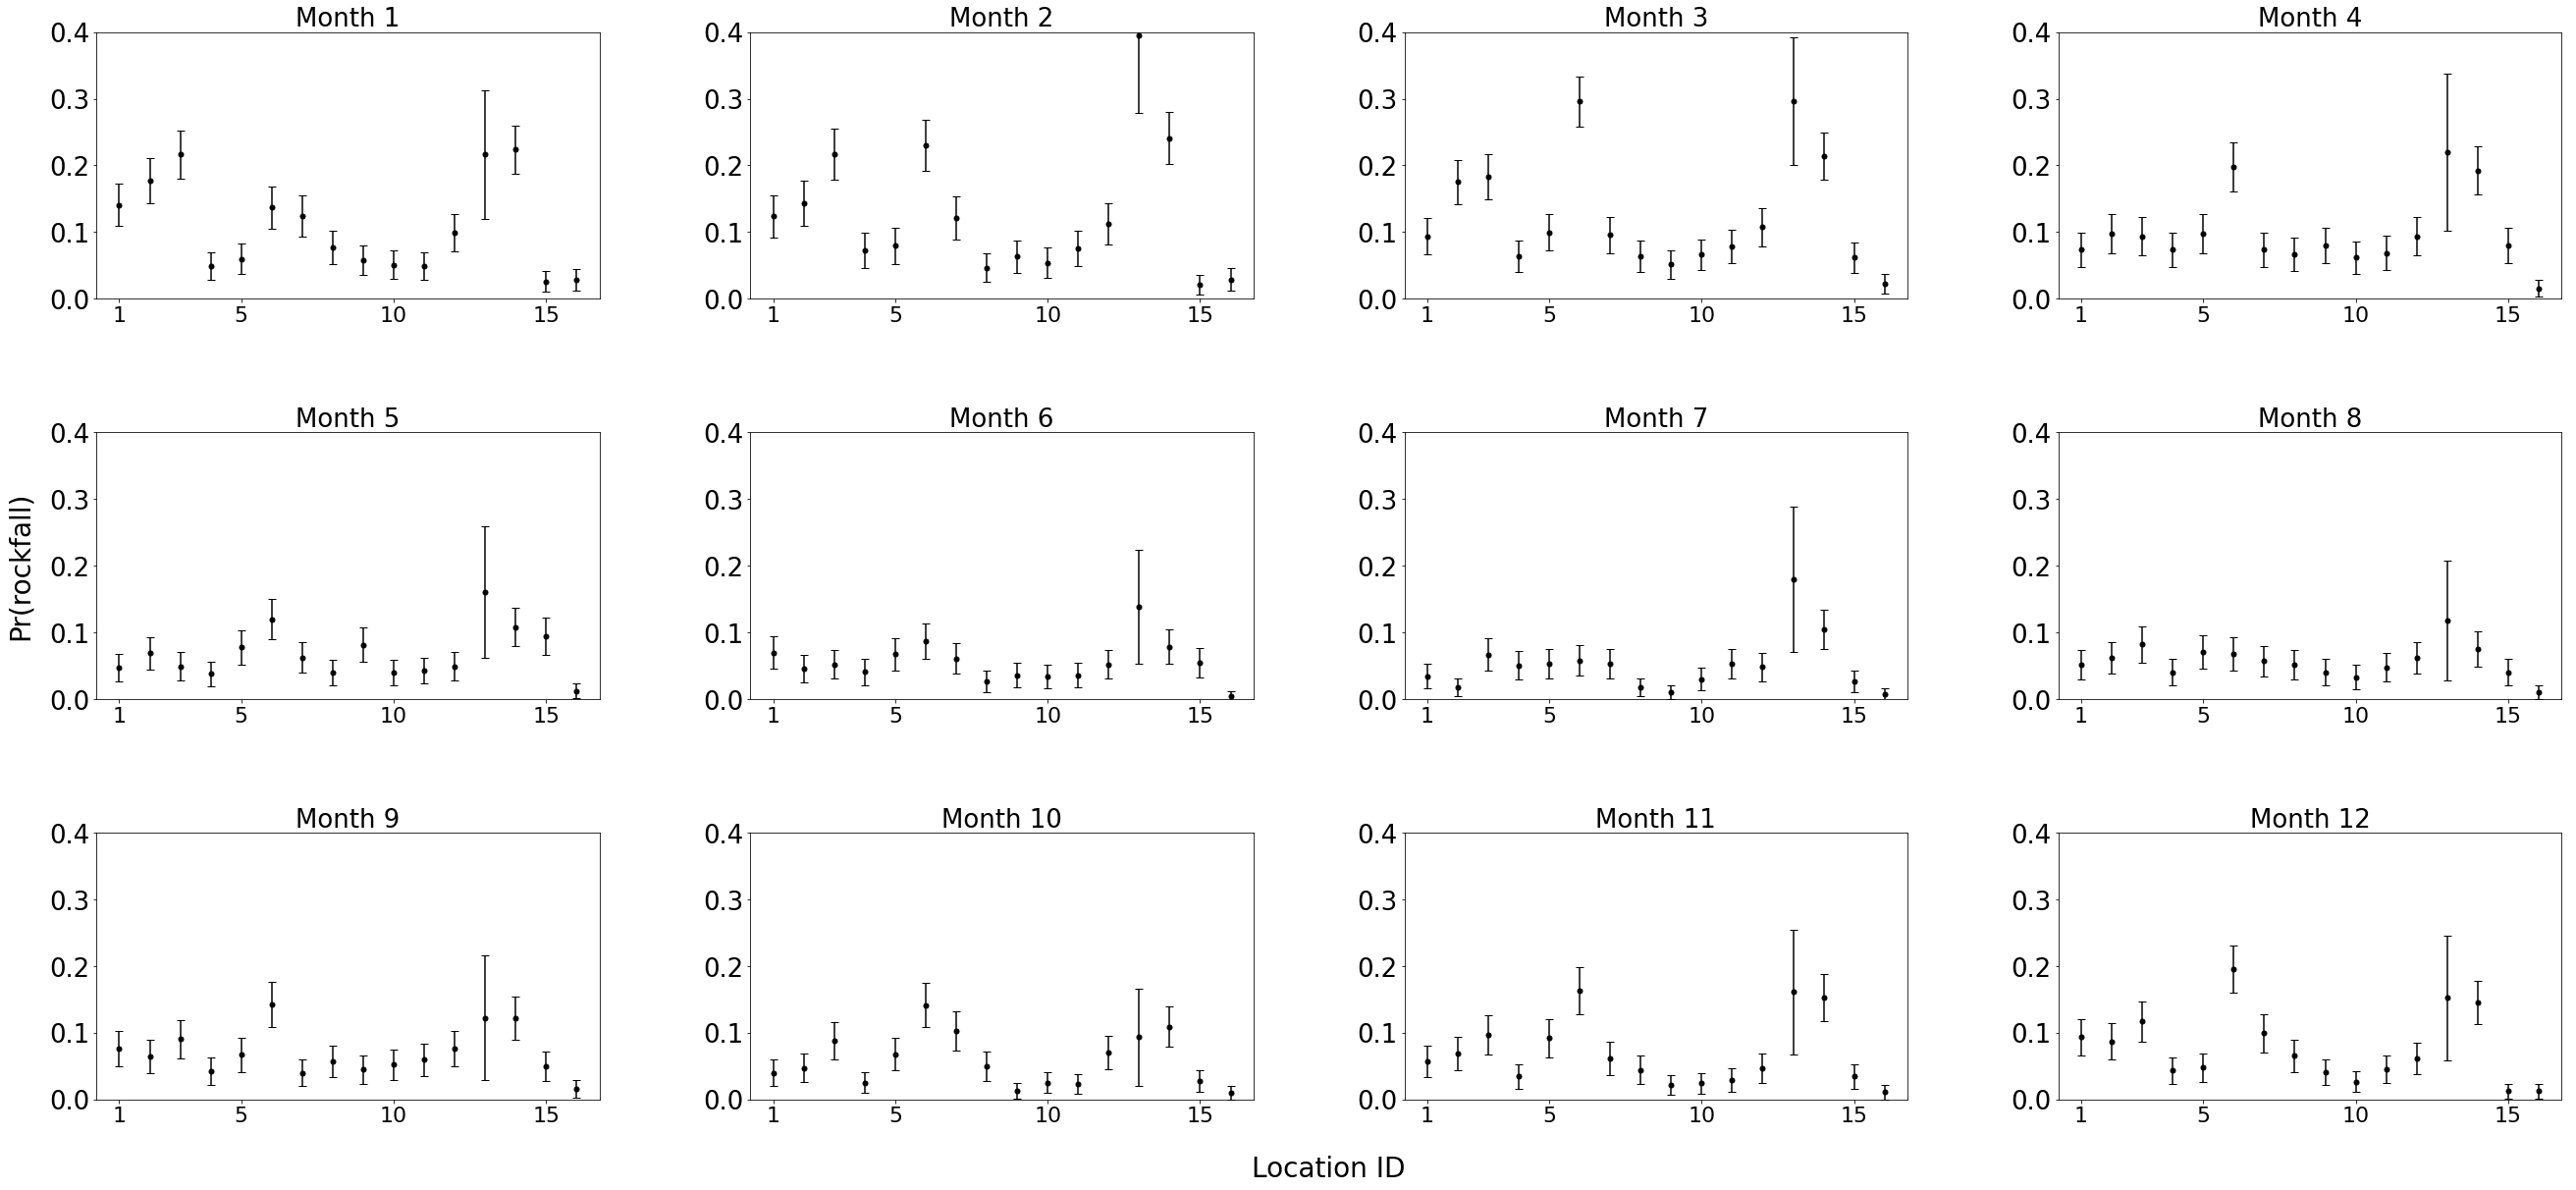

In [14]:
fig = plt.figure(figsize=(45, 20))
fig.subplots_adjust(hspace = 0.5, wspace=.3)

for i in range(0,12):
    plt.subplot(3,4,i+1)
    x = np.arange(1,17)

    # coeffisient
    y =intercepts_null_model_months[i]
    

    # Monthly
    standard_error_coef_months = np.array(standard_error_coef_null_model_months)
    y_error = standard_error_coef_months*2
    y_error = y_error[i]
    

    prob = np.exp(y)/(1+np.exp(y))
    y_error_prob = y_error*prob*(1-prob)

    plt.errorbar(x, prob, yerr = y_error_prob,fmt='o',markersize=5,capsize=4, color = 'k')
    
   
    plt.yticks(fontsize=26)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Pr(rockfall)',fontsize=26)
    plt.ylim(0,0.4)
    plt.yticks([0.0,0.1,0.2,0.3,0.4])
    #plt.axhline(y = 0, linestyle = 'dotted')

 

    plt.xticks([1,5,10,15],['1','5','10','15'],fontsize=22)
    plt.title("Month " + str(i+1),fontsize = 26)
    

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Location ID",fontsize = 28,labelpad = 40)
plt.ylabel("Pr(rockfall)",fontsize = 28,labelpad=40)

plt.savefig('Prob_months_intercepts_only_model.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

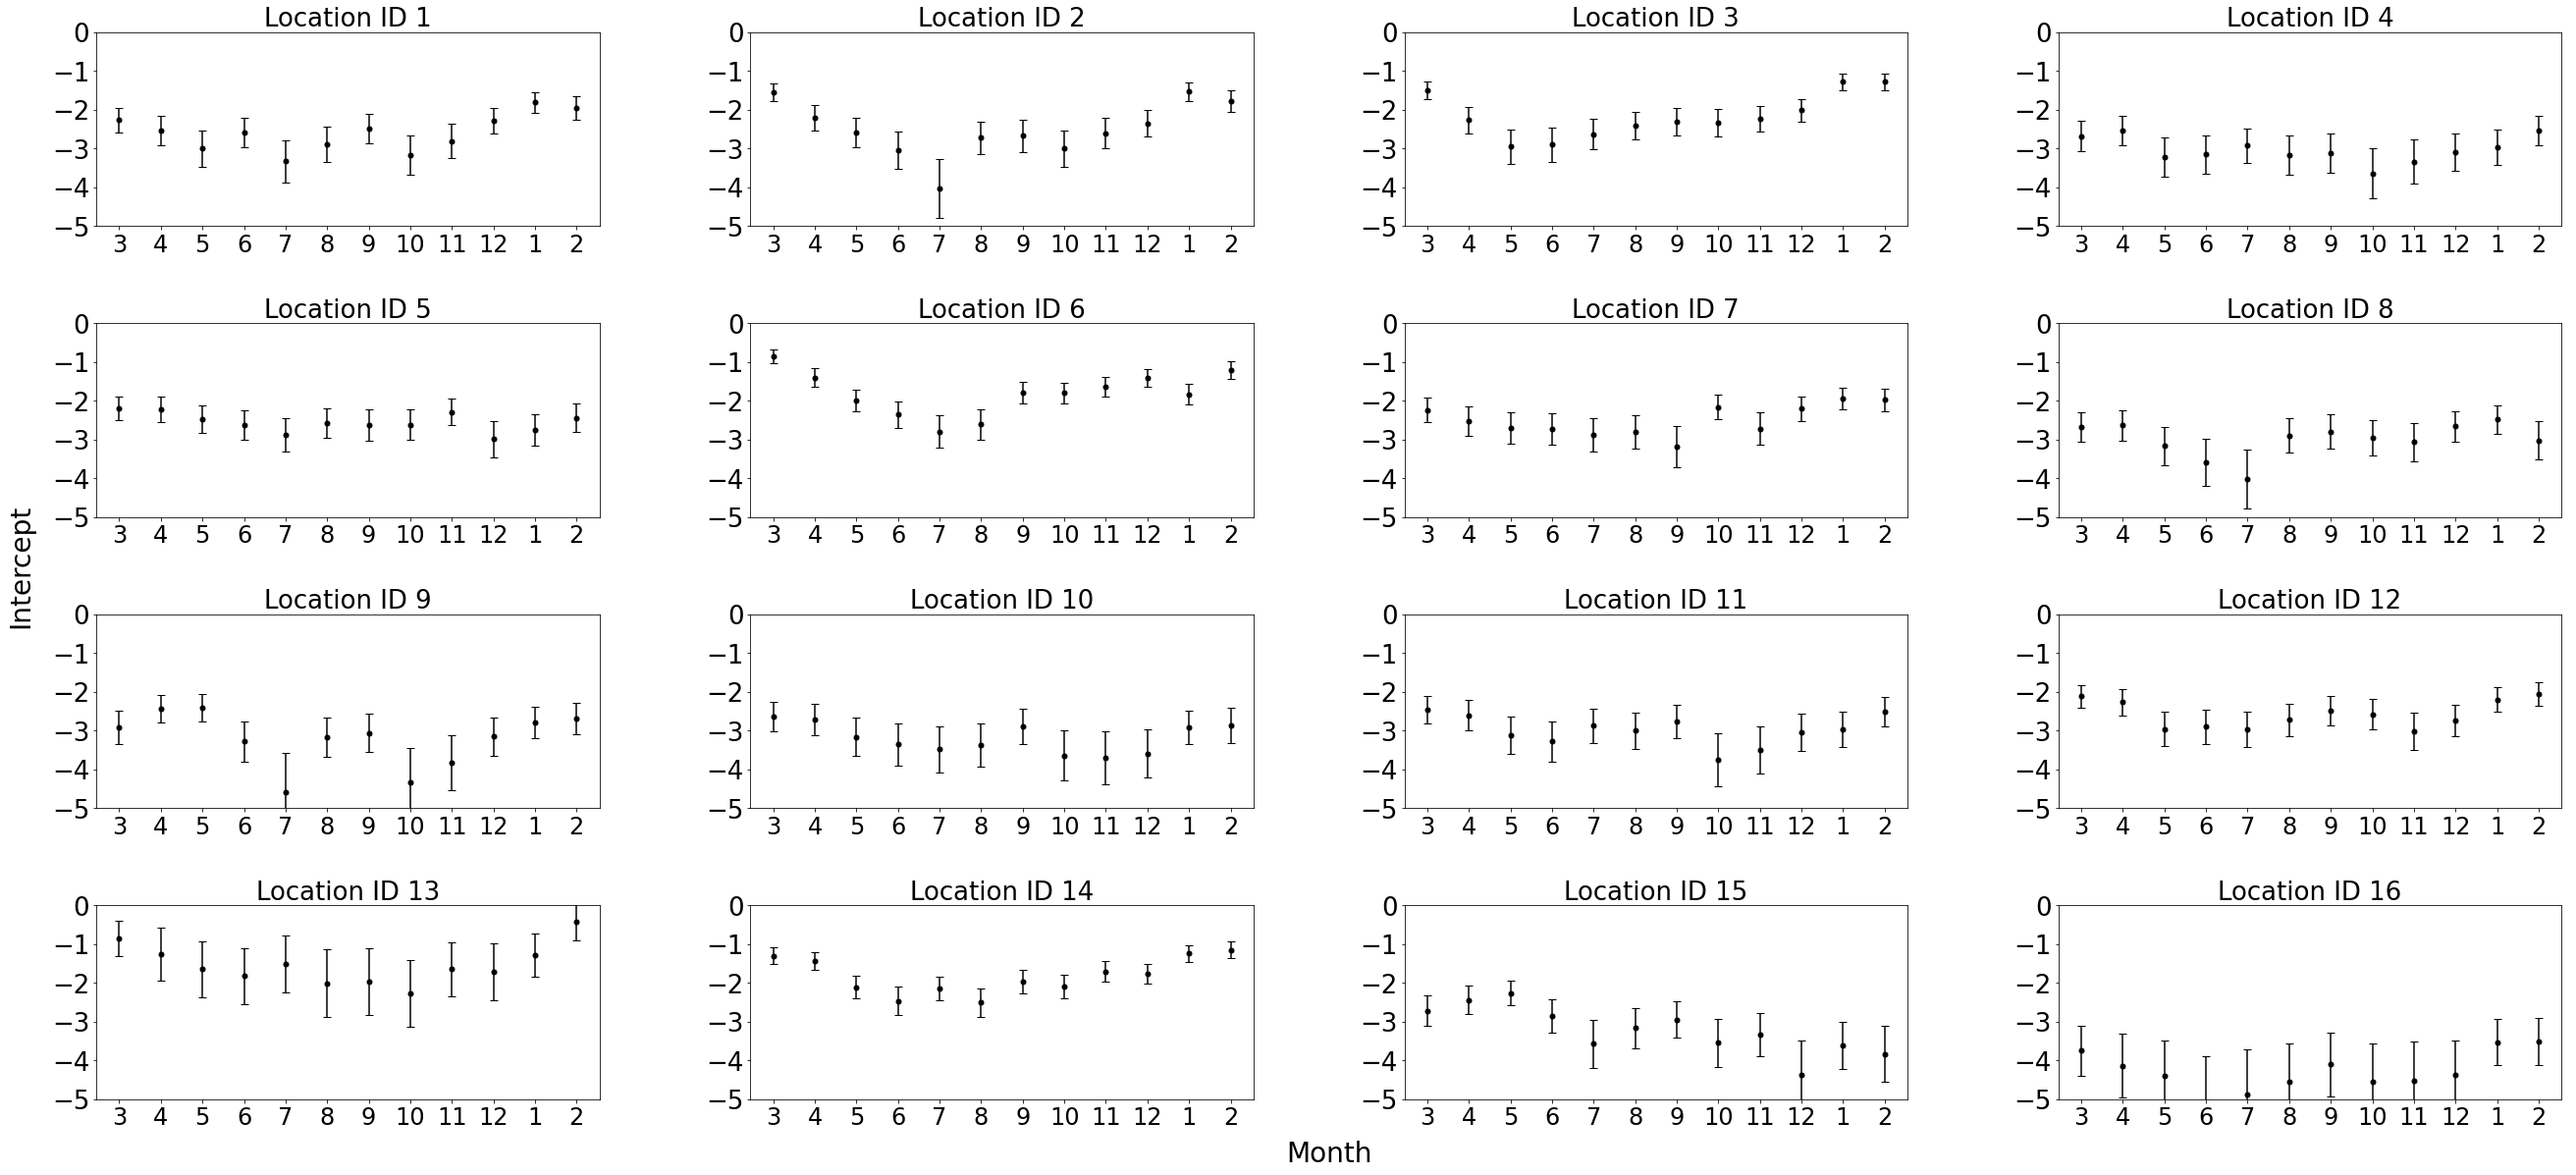

In [15]:
fig = plt.figure(figsize=(45, 20))
fig.subplots_adjust(hspace = 0.5, wspace=.3)

for i in range(0,16):
    plt.subplot(4,4,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =intercepts_null_model[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef_null_model)
    y_error = standard_error_coef*2
    y_error = y_error[i]
    
    #prob = np.exp(y)/(1+np.exp(y))
    

    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=26)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Intercept',fontsize=26)
    plt.ylim(-5,0)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['3','4','5','6','7','8','9','10','11','12','1','2'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 26)

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("Intercept",fontsize = 28,labelpad=40)

plt.savefig('Loc_intercepts_only_model2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

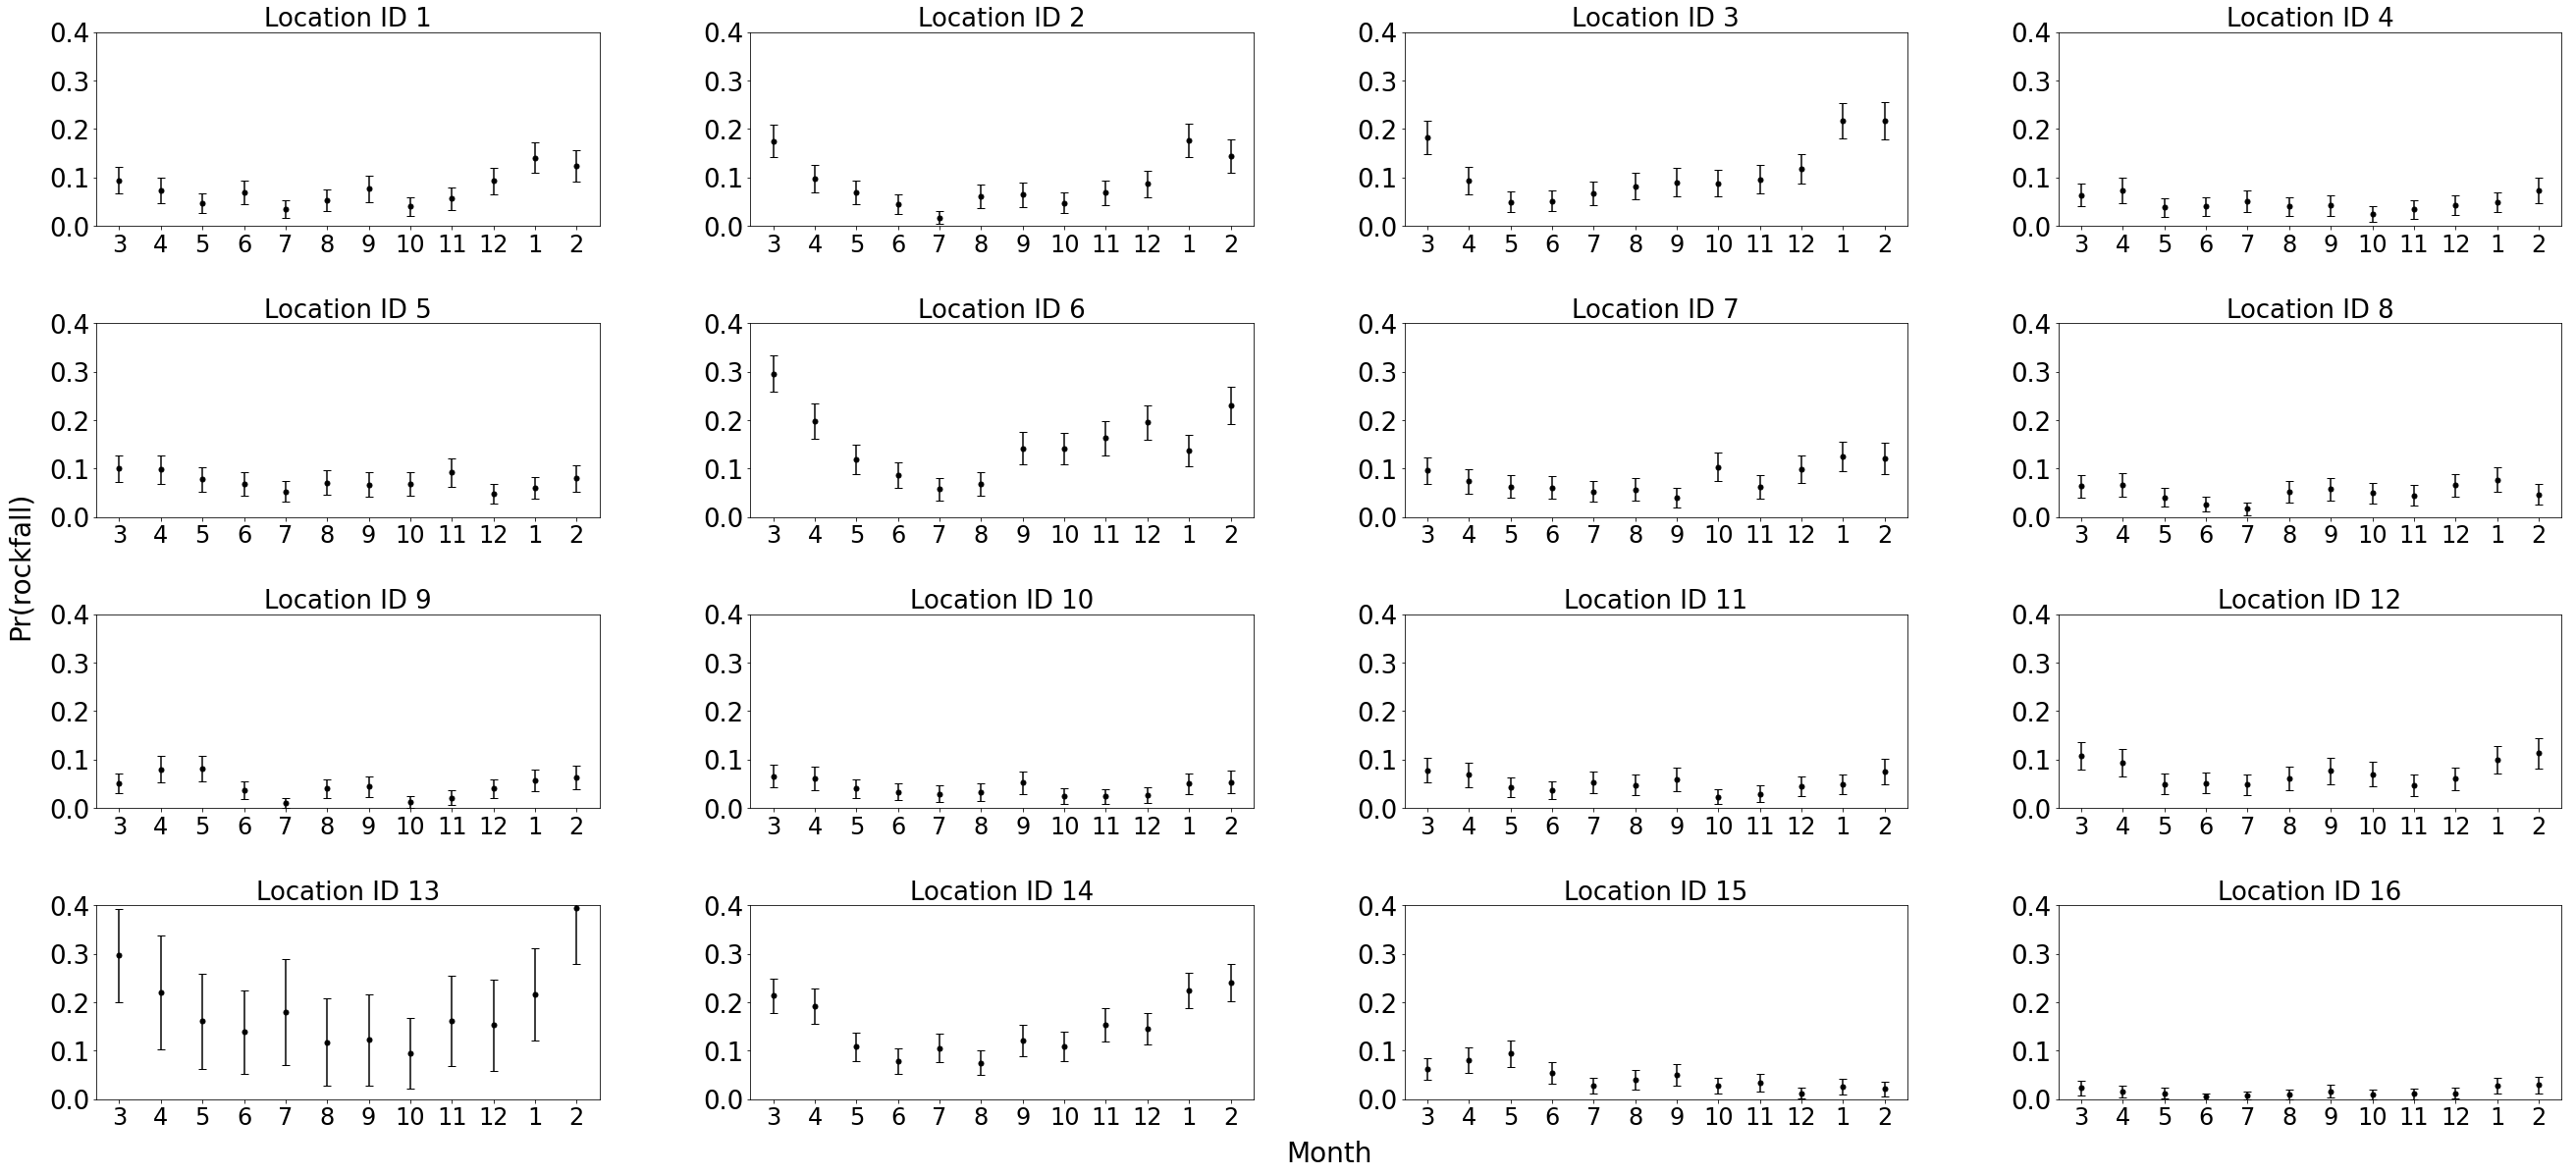

In [16]:
fig = plt.figure(figsize=(45, 20))
fig.subplots_adjust(hspace = 0.5, wspace=.3)


for i in range(0,16):
    plt.subplot(4,4,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =intercepts_null_model[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef_null_model)
    y_error = standard_error_coef*2
    y_error = y_error[i]
    

    prob = np.exp(y)/(1+np.exp(y))
    y_error_prob = y_error*prob*(1-prob)

    plt.errorbar(x, prob, yerr = y_error_prob,fmt='o',markersize=5,capsize=4, color = 'k')
    
   
    plt.yticks(fontsize=26)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Pr(rockfall)',fontsize=26)
    plt.ylim(0,0.4)
    plt.yticks([0.0,0.1,0.2,0.3,0.4])
    #plt.axhline(y = 0, linestyle = 'dotted')

 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['3','4','5','6','7','8','9','10','11','12','1','2'],fontsize=24)
    plt.title("Location ID " + str(i+1),fontsize = 26)
    

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("Pr(rockfall)",fontsize = 28,labelpad=40)

plt.savefig('Prob_loc_intercepts_only_model.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

### Daily temperature for each month for Vestland, ignore locations

In [17]:
intercepts_Vestland = []
slope_Vestland = []
standard_error_coef_Vestland = []
standard_error_slope_Vestland = []


for k in Months:
    mean_daily_temp = k['Mean_daily_temp'].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    slope_Vestland.append(log_reg.params[1])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    standard_error_slope_Vestland.append(log_reg.bse[1])

Optimization terminated successfully.
         Current function value: 0.323205
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.364557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312890
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200898
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.221716
  

Text(0.5, 1.0, 'Vestland ')

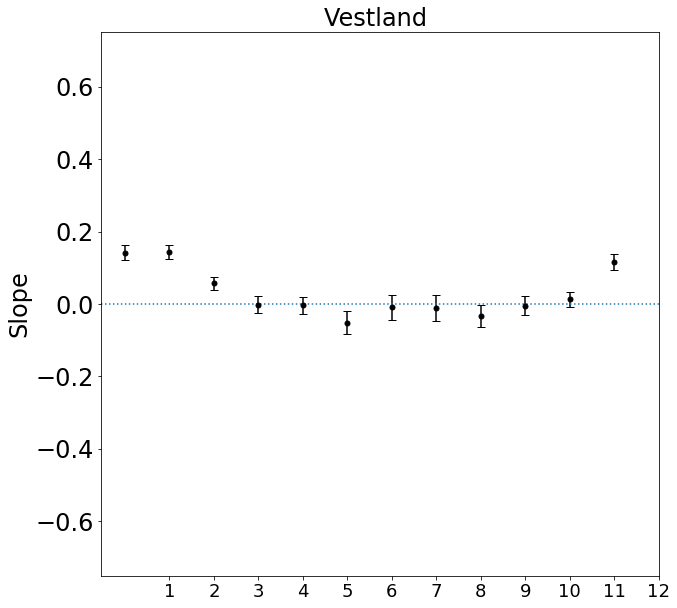

In [18]:
#Vestland
x_Vestland = np.arange(0,12)

y_Vestland = slope_Vestland
standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
y_error_vestland =  standard_error_slope_Vestland*2
y_error_vestland = y_error_vestland


fig = plt.figure(figsize=(10, 10))
plt.errorbar(x_Vestland , y_Vestland, yerr = y_error_vestland,fmt='o',markersize=5,capsize=4, color = 'k')


plt.yticks(fontsize=24)
#plt.xlabel('Month',fontsize=24)
plt.ylabel('Slope',fontsize=24)
plt.ylim(-0.75,0.75)
plt.axhline(y = 0, linestyle = 'dotted')
 

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],fontsize=18)

plt.title("Vestland ",fontsize = 24)

### Daily temperature for each season

In [19]:
Locations = [df[df['Location'] ==1], df[df['Location'] ==2],df[df['Location'] ==3], df[df['Location'] ==4], df[df['Location'] ==5], df[df['Location'] ==6], df[df['Location'] ==7],
            df[df['Location'] ==8], df[df['Location'] == 9], df[df['Location'] ==10], df[df['Location'] ==11], df[df['Location'] ==12],df[df['Location'] ==13],df[df['Location'] == 14],df[df['Location'] == 15],df[df['Location'] ==16]]


In [20]:
intercepts_seasons = []
slope_seasons = []
standard_error_coef_seasons = []
standard_error_slope_seasons = []

for i in Locations:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    
    # rockfall climate, daily temp

    # spring
    march = i[month== 3]
    april = i[month== 4]
    may = i[month== 5]

    spring = [march, april, may]
    spring = pd.concat(spring)


    # summer 
    jun = i[month == 6]
    jul = i[month == 7]
    aug = i[month == 8]

    summer = [jun, jul, aug]
    summer = pd.concat(summer)


    # autumn
    sep = i[month == 9]
    okt = i[month == 10]
    nov = i[month == 11]

    autumn = [sep, okt, nov]
    autumn = pd.concat(autumn)

    # winter
    dec = i[month == 12]
    jan = i[month == 1]
    feb = i[month == 2]
    
    winter = [dec, jan, feb]
    winter = pd.concat(winter)
    
   
    Seasons = [spring,summer,autumn,winter]
    
    for k in Seasons:
            mean_daily_temp = k['Mean_daily_temp'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k.append(log_reg.params[1])
    
            standard_error_coef_k.append(log_reg.bse[0])
            standard_error_slope_k.append(log_reg.bse[1])

    intercepts_seasons.append(intercepts_k)
    slope_seasons.append(slope_k)
    standard_error_coef_seasons.append(standard_error_coef_k)
    standard_error_slope_seasons.append(standard_error_slope_k)
            
            
            

<ipython-input-20-6e56025717b7>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  march = i[month== 3]
<ipython-input-20-6e56025717b7>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  april = i[month== 4]
<ipython-input-20-6e56025717b7>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  may = i[month== 5]
<ipython-input-20-6e56025717b7>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jun = i[month == 6]
<ipython-input-20-6e56025717b7>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jul = i[month == 7]
<ipython-input-20-6e56025717b7>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aug = i[month == 8]
<ipython-input-20-6e56025717b7>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sep = i[month == 9]
<ipython-input-20-6e56025717b7>:35: UserWarning: Boolean Seri

Optimization terminated successfully.
         Current function value: 0.252666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.199058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.220300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.365834
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.355148
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.166867
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.222533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.350485
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.245324
  

### Daily temperature for each month

In [21]:
intercepts = []
slope = []
standard_error_coef = []
standard_error_slope = []
#probability_rockfall = []
p_values = []
significance_slope = []
significance_coef = []
confidence_interval = []

log_likelihood = []

for i in Locations:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    probability_rockfall_k = []
    p_values_k = []
    significance_k = []
    significance_coef_k = []
    confidence_interval_k = []
    
    log_likelihood_k = []
    
    months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
               i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]
    
    for k in months:
        
            mean_daily_temp = k['Mean_daily_temp'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k.append(log_reg.params[1])
    
            standard_error_coef_k.append(log_reg.bse[0])
            standard_error_slope_k.append(log_reg.bse[1])
            
            prob_rockfall =  np.exp(log_reg.bse[0])/(1+np.exp(log_reg.bse[0]))
            probability_rockfall_k.append(prob_rockfall)
            p_values_k.append(log_reg.pvalues)
            
            confidence_interval_k.append(log_reg.conf_int(alpha=0.05))
            
            if log_reg.pvalues[1] > 0.05:
                significance_k.append('no')
            if log_reg.pvalues[1] < 0.05:
                significance_k.append('yes')
                
                        
            if log_reg.pvalues[0] > 0.05:
                significance_coef_k.append('no')
            if log_reg.pvalues[0] < 0.05:
                significance_coef_k.append('yes')
                
            log_likelihood_k.append(log_reg.llr)   
                

    intercepts.append(intercepts_k)
    slope.append(slope_k)
    standard_error_coef.append(standard_error_coef_k)
    standard_error_slope.append(standard_error_slope_k)
    #probability_rockfall.append(probability_rockfall_k)
    p_values.append(p_values_k)     
    significance_slope.append(significance_k)      
    significance_coef.append(significance_coef_k)     
    confidence_interval.append(confidence_interval_k)        
    log_likelihood.append(log_likelihood_k)

Optimization terminated successfully.
         Current function value: 0.309895
         Iterations 6


<ipython-input-21-326ff8ac1b80>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
<ipython-input-21-326ff8ac1b80>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]


Optimization terminated successfully.
         Current function value: 0.248370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.188829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.136693
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.258421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.167868
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.216292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309835
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.403162
  

Optimization terminated successfully.
         Current function value: 0.233185
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.238362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.168487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.123269
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.086462
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.197416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.178738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.228644
  

Optimization terminated successfully.
         Current function value: 0.267758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204869
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.121735
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.166089
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.188882
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.124116
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.137876
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.056831
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.111785
 

### Daily temperature for each month and location

In [22]:
intercepts_month = []
slope_month = []
standard_error_coef_month = []
standard_error_slope_month = []
p_values_month = []
significance = []

Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

for i in Months:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    p_values_k = []
    significance_k = []
    i = pd.DataFrame(i)
    
   
    Locations = [i[i['Location'] ==1], i[i['Location'] ==2],i[i['Location'] ==3], i[i['Location'] ==4], i[i['Location'] ==5], i[i['Location'] ==6], i[i['Location'] ==7],
            i[i['Location'] ==8], i[i['Location'] == 9], i[i['Location'] ==10], i[i['Location'] ==11], i[i['Location'] ==12],i[i['Location'] ==13],i[i['Location'] == 14],i[i['Location'] == 15],i[i['Location'] ==16]]
    
    for k in Locations:
        print(k) 
        mean_daily_temp = k['Mean_daily_temp'].values
        mean_daily_temp.reshape(-1, 1)

        y = k['Rockfall']

        #centering the model
        #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
        log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
        intercepts_k.append(log_reg.params[0])
        slope_k.append(log_reg.params[1])
    
        standard_error_coef_k.append(log_reg.bse[0])
        standard_error_slope_k.append(log_reg.bse[1])
        
        p_values_k.append(log_reg.pvalues)
        
        if log_reg.pvalues[1] > 0.05:
            significance_k.append('no')
        if log_reg.pvalues[1] < 0.05:
            significance_k.append('yes')

    intercepts_month.append(intercepts_k)
    slope_month.append(slope_k)
    standard_error_coef_month.append(standard_error_coef_k)
    standard_error_slope_month.append(standard_error_slope_k)
    p_values_month.append(p_values_k)       
    significance.append(significance_k)    
            

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
82            428 1991-03-05         1             2.58        0.00         0   
98            432 1991-03-09         1             6.90        2.10         0   
121           433 1991-03-10         1             7.24        1.76         0   
139           437 1991-03-14         1             5.40       14.23         0   
161           451 1991-03-28         1             6.93        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74864       10677 2019-03-27         1             3.92       11.96         0   
74879       10678 2019-03-28         1             7.22        3.94         0   
74906       10679 2019-03-29         1             8.42       15.32         0   
74915       10680 2019-03-30         1             5.68       36.80         0   
74937       10681 2019-03-31         1             1.88       14.31         0   

       Temp*Prec  dummy_var

[454 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.222863
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
96            428 1991-03-05        11             1.96       10.04         0   
102           432 1991-03-09        11             6.57        3.33         0   
114           433 1991-03-10        11             5.85        5.72         0   
137           437 1991-03-14        11             4.34       32.30         0   
150           451 1991-03-28        11             4.94        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74871       10677 2019-03-27        11             4.07       11.89         0   
74887       10678 2019-03-28        11             6.64        4.13         0   
74902       10679 2019-03-29        11             7.14        2.08         0   
74910       10680 2019-03-30        11             6.33       14.

Optimization terminated successfully.
         Current function value: 0.258477
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
188           458 1991-04-04         5             1.84        5.28         0   
201           470 1991-04-16         5             0.53        0.00         0   
218           472 1991-04-18         5            -3.45        0.00         0   
237           480 1991-04-26         5             0.84        0.00         0   
1137          825 1992-04-05         5            -1.65        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75335       10707 2019-04-26         5             9.11        0.77         0   
75351       10708 2019-04-27         5             9.28        0.11         0   
75365       10709 2019-04-28         5             9.43        0.67         0   
75375       10710 2019-04-29         5             8.76        0.00         0   
75397  

Optimization terminated successfully.
         Current function value: 0.457979
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
184           458 1991-04-04        15            -2.04       11.18         0   
199           470 1991-04-16        15            -4.50        2.80         0   
215           472 1991-04-18        15            -7.42        0.00         0   
236           480 1991-04-26        15            -3.13        0.00         0   
1127          825 1992-04-05        15            -6.17        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75342       10707 2019-04-26        15             4.87        1.28         0   
75352       10708 2019-04-27        15             5.59        3.89         0   
75372       10709 2019-04-28        15             4.65        8.95         0   
75377       10710 2019-04-29        15             5.83        0.00         0   
75394  

Optimization terminated successfully.
         Current function value: 0.202547
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
259           497 1991-05-13        10             4.24        3.24         0   
1268          852 1992-05-02        10             3.36        3.87         0   
1278          863 1992-05-13        10             2.86       34.42         0   
1297          878 1992-05-28        10            13.93        0.00         0   
1308          879 1992-05-29        10            13.70        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75820       10738 2019-05-27        10             6.81        0.00         0   
75842       10739 2019-05-28        10             5.54        0.00         0   
75861       10740 2019-05-29        10             2.37        4.94         0   
75863       10741 2019-05-30        10             2.86       17.34         0   
75890  

[429 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.201712
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
273           518 1991-06-03         6         5.010000        0.00         0   
280           522 1991-06-07         6         4.960000        5.66         0   
296           533 1991-06-18         6         9.390000        0.00         0   
313           536 1991-06-21         6         8.930000        7.37         0   
329           539 1991-06-24         6         9.070000        5.25         0   
...           ...        ...       ...              ...         ...       ...   
76296       10769 2019-06-27         6        11.480000        0.00         0   
76302        4745 2019-06-27         6        10.283387        0.00         1   
76320       10770 2019-06-28         6        11.080000        4.00         0   
76332       10771 2019-06-29         6        12.590000        0.

[423 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.204869
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
264           518 1991-06-03        16             5.64        1.73         0   
288           522 1991-06-07        16             6.57       26.78         0   
298           533 1991-06-18        16            10.26        0.00         0   
317           536 1991-06-21        16             8.73        0.51         0   
339           539 1991-06-24        16            10.96        7.01         0   
...           ...        ...       ...              ...         ...       ...   
76279       10768 2019-06-26        16            14.29        0.21         0   
76298       10769 2019-06-27        16            11.30        0.10         0   
76317       10770 2019-06-28        16            12.47        0.00         0   
76323       10771 2019-06-29        16            13.30        0.

[396 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.056395
         Iterations 9
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
351           552 1991-07-07        10            19.18        0.00         0   
369           554 1991-07-09        10            20.14        3.28         0   
380           565 1991-07-20        10            12.91        5.36         0   
407           566 1991-07-21        10            13.14        1.02         0   
409           567 1991-07-22        10            13.36        0.00         0   
...           ...        ...       ...              ...         ...       ...   
76465       10780 2019-07-08        10            10.11        3.48         0   
76479       10781 2019-07-09        10            10.84        0.00         0   
76502       10782 2019-07-10        10            12.68        0.00         0   
76511       10783 2019-07-11        10            14.83        0.

[406 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.220944
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
442           578 1991-08-02         3            18.81        0.00         0   
462           580 1991-08-04         3            16.79       11.81         0   
477           584 1991-08-08         3            12.12        0.00         0   
494           591 1991-08-15         3            11.62       10.88         0   
518           596 1991-08-20         3            11.01        6.05         0   
...           ...        ...       ...              ...         ...       ...   
71514       10465 2018-08-27         3             8.93        4.59         0   
71525       10466 2018-08-28         3            10.25        4.21         0   
71545       10467 2018-08-29         3            13.04        0.10         0   
71554       10468 2018-08-30         3            10.56       23.

[406 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.211795
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
440           578 1991-08-02        13        19.320000        0.00         0   
469           580 1991-08-04        13        16.630000        0.00         0   
482           584 1991-08-08        13        13.540000        0.00         0   
496           591 1991-08-15        13        13.430000        3.66         0   
519           596 1991-08-20        13        11.660000        2.95         0   
530           602 1991-08-26        13        12.310000        0.00         0   
1398          948 1992-08-06        13        12.480000       20.82         0   
1413          950 1992-08-08        13        10.820000        0.16         0   
1417          951 1992-08-09        13        11.700000        0.00         0   
1442          967 1992-08-25        13         9.930000        5.

[382 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.205280
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
549           608 1991-09-01        11            13.70        0.00         0   
562           609 1991-09-02        11            14.88        0.00         0   
580           612 1991-09-05        11            11.00       24.65         0   
597           613 1991-09-06        11             9.23        0.00         0   
613           623 1991-09-16        11            11.03       10.31         0   
...           ...        ...       ...              ...         ...       ...   
71982       10495 2018-09-26        11            10.44       71.33         0   
72006       10496 2018-09-27        11             9.92       10.50         0   
72024       10497 2018-09-28        11             6.83       20.67         0   
72041       10498 2018-09-29        11             7.52       22.

[420 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.295150
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
629           640 1991-10-03         4        -0.820000        0.72         0   
637           641 1991-10-04         4         1.990000       28.82         0   
661           649 1991-10-12         4         5.590000        0.00         0   
667           657 1991-10-20         4        -2.990000        0.00         0   
681           658 1991-10-21         4        -2.620000        1.50         0   
...           ...        ...       ...              ...         ...       ...   
72516       10528 2018-10-29         4        -5.180000        0.00         0   
72533       10529 2018-10-30         4        -3.520000        0.00         0   
72550       10530 2018-10-31         4         2.010000        1.51         0   
76563        4432 2019-10-14         4         0.993392        0.

Optimization terminated successfully.
         Current function value: 0.124116
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
626           640 1991-10-03        16             6.60        1.95         0   
633           641 1991-10-04        16             8.35       13.72         0   
655           649 1991-10-12        16             9.23        0.30         0   
672           657 1991-10-20        16             3.20        0.00         0   
695           658 1991-10-21        16             2.30        2.83         0   
...           ...        ...       ...              ...         ...       ...   
72478       10526 2018-10-27        16             3.40        0.00         0   
72497       10527 2018-10-28        16             1.59        0.00         0   
72505       10528 2018-10-29        16             0.93        0.10         0   
72532       10529 2018-10-30        16             2.84        0.00         0   
72545  

Optimization terminated successfully.
         Current function value: 0.379532
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
702           674 1991-11-06        14        -2.400000       10.79         0   
720           687 1991-11-19        14        -6.220000        0.00         0   
731           688 1991-11-20        14        -9.670000        0.00         0   
1587         1050 1992-11-16        14        -7.530000        0.10         0   
1600         1052 1992-11-18        14        -6.360000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
72986       10559 2018-11-29        14        -0.400000        3.34         0   
72991         997 2018-11-29        14         1.556110        4.27         1   
73009       10560 2018-11-30        14         3.660000       14.16         0   
76568        1307 2019-11-04        14         1.577210        0.00         1   
76569  

Optimization terminated successfully.
         Current function value: 0.314046
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
759           700 1991-12-02         8            -2.68        0.40         0   
770           703 1991-12-05         8            -0.03        0.10         0   
790           704 1991-12-06         8            -2.88        0.10         0   
805           716 1991-12-18         8            -0.66        3.48         0   
820           720 1991-12-22         8            -6.13        4.45         0   
...           ...        ...       ...              ...         ...       ...   
73418       10587 2018-12-27         8             1.95        1.61         0   
73446       10588 2018-12-28         8             1.49        1.34         0   
73460       10589 2018-12-29         8            -0.13        0.19         0   
73473       10590 2018-12-30         8            -0.95        1.73         0   
73480  

[522 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.481126
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
0             367 1991-01-03         4            -0.96       22.44         0   
891           733 1992-01-04         4            -0.02       16.72         0   
904           734 1992-01-05         4            -4.33       14.41         0   
914           737 1992-01-08         4             0.35       12.13         0   
930           738 1992-01-09         4            -3.69        8.08         0   
...           ...        ...       ...              ...         ...       ...   
73900       10618 2019-01-27         4            -5.14        0.00         0   
73914       10619 2019-01-28         4            -7.57        0.00         0   
73929       10620 2019-01-29         4            -8.54        1.77         0   
73943       10621 2019-01-30         4            -4.29        0.

[421 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.373698
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
31            401 1991-02-06         2        -9.940000        0.00         0   
40            410 1991-02-15         2       -11.820000        3.48         0   
63            414 1991-02-19         2        -8.140000        5.69         0   
64           6444 1991-02-22         2         0.941565        4.97         1   
73            418 1991-02-23         2        -3.930000        6.08         0   
...           ...        ...       ...              ...         ...       ...   
74359       10646 2019-02-24         2         4.070000        5.29         0   
74379       10647 2019-02-25         2        -0.130000        2.30         0   
74391       10648 2019-02-26         2         1.770000        2.60         0   
74416       10649 2019-02-27         2         2.480000        0.

[399 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.264710
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
30            401 1991-02-06        12        -2.870000        0.00         0   
44            410 1991-02-15        12        -8.310000        5.81         0   
53            414 1991-02-19        12        -7.150000        5.37         0   
78            418 1991-02-23        12         2.360000       16.60         0   
1020          778 1992-02-18        12        -7.760000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74373       10647 2019-02-25        12         3.930000        0.00         0   
74388       10648 2019-02-26        12         2.990000        1.72         0   
74412       10649 2019-02-27        12         4.030000        0.00         0   
74427       10650 2019-02-28        12         2.550000        1.

In [23]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,17)

    # coeffisient
    y =slope_month[i]
    

    # Monthly
    standard_error_slope_month = np.array(standard_error_slope_month)
    y_error = standard_error_slope_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    #plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel('b_1 (slope)',fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Month_slope_mean_daily_temp_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,17)

    # coeffisient
    y =slope_month[i]
    

    # Monthly
    standard_error_slope_month = np.array(standard_error_slope_month)
    y_error = standard_error_slope_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    #plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel('b_1 (slope)',fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Month_slope_mean_daily_temp_2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

In [25]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,17)

    # coeffisient
    y =intercepts_month[i]
    

    # Monthly
    standard_error_intercepts_month = np.array(standard_error_coef_month)
    y_error = standard_error_coef_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = intercepts_Vestland[i]
    standard_error_coef_Vestland = np.array(standard_error_coef_Vestland)
    y_error_vestland =  standard_error_coef_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'k', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-8,4)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel("b_0 (intercept)",fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Month_intercept_mean_daily_temp_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

In [26]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,17)

    # coeffisient
    y =intercepts_month[i]
    

    # Monthly
    standard_error_intercepts_month = np.array(standard_error_coef_month)
    y_error = standard_error_coef_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = intercepts_Vestland[i]
    standard_error_coef_Vestland = np.array(standard_error_coef_Vestland)
    y_error_vestland =  standard_error_coef_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'k', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-8,4)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel("b_0 (intercept)",fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Month_intercept_mean_daily_temp_2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =slope[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]

    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='dotted')
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='dotted')
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Loc_slope_mean_daily_temp_with_Vestland_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

In [28]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =slope[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]

    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='dotted')
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='dotted')
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Loc_slope_mean_daily_temp_with_Vestland_2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

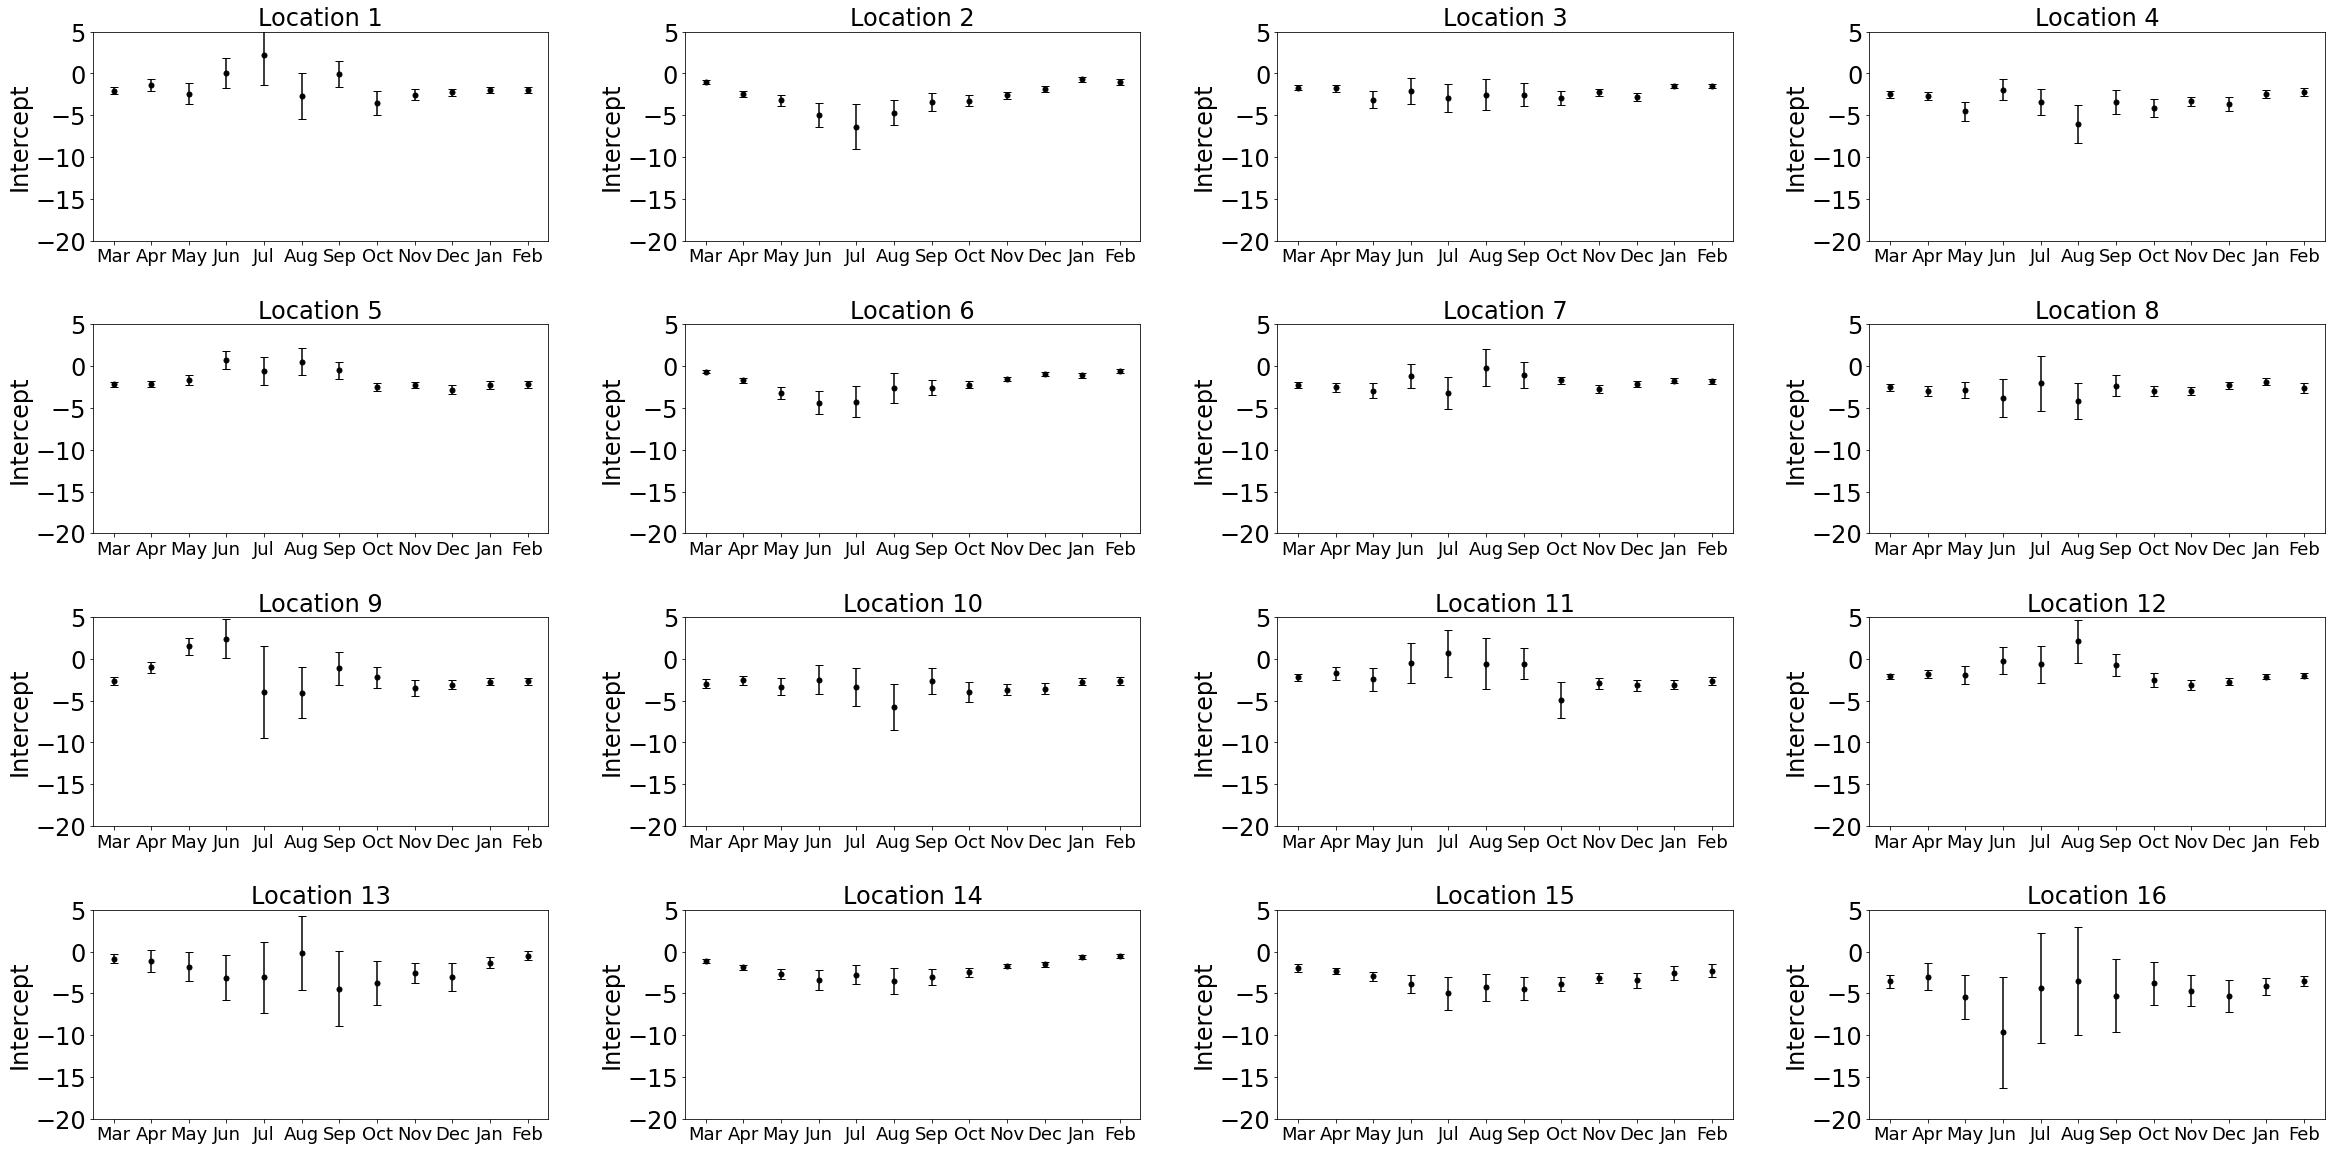

In [29]:
fig = plt.figure(figsize=(40, 20))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,16):
    plt.subplot(4,4,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =intercepts[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef)
    y_error = standard_error_coef*2
    y_error = y_error[i]

    
    #Vestland
    #y_vestland = intercepts_Vestland[i]
    #standard_error_intercepts_Vestland = np.array(standard_error_coef_Vestland)
    #y_error_vestland =  standard_error_coef_Vestland*2
    #y_error_vestland = y_error_vestland[i]


    #plt.axhline(y = y_vestland, color = 'k', linestyle ='solid',linewidth=0.6)
    #plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    

    # Monthly
    standard_error_slope = np.array(standard_error_coef)
    y_error = standard_error_coef*2
    y_error = y_error[i]


    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-20,5)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    
plt.savefig('Loc_intercepts_mean_daily_temp.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

In [30]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Loc_slope_mean_daily_temp_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

In [31]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error1 = standard_error_slope*2
    y_error1 = y_error1[i]


        
    plt.errorbar(x, y, yerr = y_error1,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.close()
plt.savefig('Loc_slope_mean_daily_temp_2.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(12,16):
    plt.subplot(2,3,i-11)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)
    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.close()
    
plt.savefig('Loc_slope_mean_daily_temp_3.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace = 0.3, wspace=.3)

for i in range(12,16):
    plt.subplot(3,2,i-9)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =intercepts[i]
    
    # Seasonal
    y_seasons = intercepts_seasons[i]
    standard_error_coef_seasons = np.array(standard_error_coef_seasons)
    y_error_seasons = standard_error_coef_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef)
    y_error = standard_error_coef*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-20,5)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    plt.close()
    
plt.savefig('Loc_intercept_mean_daily_temp_3.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

<Figure size 432x288 with 0 Axes>

### Probability of rockfall with daily temperature for each location for some chosen range of X (temperature)

In [34]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace = 0.3, wspace=.3)

for i in range(0,6):
    plt.subplot(3,2,i+1)
    x= np.arange(0,30)
    #x = np.arange(1,13)
    y = intercepts[i][3] + slope[i][3]*x
    prob = np.exp(y)/(1+np.exp(y))
        
    plt.plot(x, prob, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel(y)
    plt.ylabel('Pr(Rockfall)',fontsize=24)
    plt.ylim(0,1)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    plt.close()
    
plt.savefig('Prob_mean_daily_mean_temp_rockfall.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

<Figure size 432x288 with 0 Axes>

### Summary tables

In [35]:
# daily mean temperature

locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Intercept estimate': [item[i] for item in intercepts],
        'SE intercept': [item[i] for item in standard_error_coef],
        'p < 0.05': [item[i] for item in significance_coef],
        'Slope estimate': [item[i] for item in slope],
        'SE slope': [item[i] for item in standard_error_slope],
        'p < 0.05 ': [item[i] for item in significance_slope]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_daily_temp_summary' + str(i) + '.xlsx')

In [36]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Log-likelihood': [item[i] for item in log_likelihood]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_daily_temp_LogLikelihood' + str(i) + '.xlsx')

In [37]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data2 = {'Location': locations,
        'Likelihood ratio chi-square': [item[i] for item in likelihood_ratio_chi]}

    data2 = pd.DataFrame(data)

    data2.to_excel('Logistic_regression_null_model_Likelihood_ratio_chi_square' + str(i) + '.xlsx')

In [38]:
mean_llh_months = np.mean(log_likelihood, axis=0)
mean_llh_months = pd.DataFrame(mean_llh_months)
mean_llh_months.to_excel('Log_likelihood_mean_daily_temp' + '.xlsx')

In [40]:
#for i in range(0,12):
#    dat = {'Location':locations,
#          '[0.05':[item[i] for item in confidence_interval[1][0][1]],
#          '[0.95':[item[i] for item in confidence_interval[1][1][1]]}
#    dat = pd.DataFrame(dat)
#    dat.to_excel('Lr_mean_daily_temp_confidence_interval' + str(i) + '.xlsx')